In [1]:
import keras
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../CustomLayers/')
from CustomLayers import *
from keras.layers import Input, Convolution2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, AveragePooling2D, Activation, Reshape
from keras.layers.advanced_activations import PReLU
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import optimizers
from PIL import Image

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

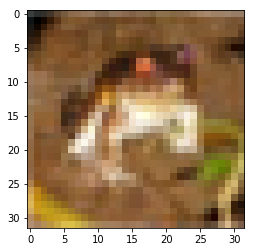

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [4]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
img_w = 32
img_h = 32
img_c = 3
inp = Input(shape=(img_w, img_h, img_c))

z = Convolution2D(32, (3,3), activation='relu')(inp)
z = MaxPooling2D(pool_size=(3,3), strides=(2,2))(z)

z = BatchNormalization()(z)
#z = Convolution2D(32, (3,3), activation='relu')(z)
#z = BinLayer()(z)
z = MultibitLayer(3)(z)
z = BinConv(128, (3,3), kernel_regularizer=BinReg(), padding='same')(z)
z = PReLU()(z)
z = MaxPooling2D(pool_size=(3,3), strides=(2,2))(z)

z = BatchNormalization()(z)
#z = BinLayer()(z)
z = MultibitLayer(3)(z)
z = BinConv(128, (3,3), kernel_regularizer=BinReg(), padding='same')(z)
z = PReLU()(z)
z = MaxPooling2D(pool_size=(3,3), strides=(2,2))(z)

z = BatchNormalization()(z)
z = Convolution2D(10, (1,1), activation='relu')(z)
z = AveragePooling2D(pool_size=(int(z.shape[1]), int(z.shape[2])))(z)
z = Reshape((10,))(z)
z = Activation('softmax')(z)

model = Model(inputs=inp, outputs=z)

In [6]:
sgd = optimizers.SGD(lr=0.1, momentum=0.9, decay=.0005)
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1,
          validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s - loss: 1.8853 - acc: 0.5329 - val_loss: 1.7674 - val_acc: 0.5661
Epoch 2/10
50000/50000 [==============================] - 9s - loss: 1.5281 - acc: 0.6608 - val_loss: 1.6973 - val_acc: 0.6105
Epoch 3/10
50000/50000 [==============================] - 9s - loss: 1.3914 - acc: 0.7107 - val_loss: 1.4820 - val_acc: 0.6802
Epoch 4/10
50000/50000 [==============================] - 9s - loss: 1.2959 - acc: 0.7421 - val_loss: 1.4942 - val_acc: 0.6727
Epoch 5/10
50000/50000 [==============================] - 9s - loss: 1.2333 - acc: 0.7640 - val_loss: 1.3462 - val_acc: 0.7243
Epoch 6/10
50000/50000 [==============================] - 9s - loss: 1.1787 - acc: 0.7816 - val_loss: 1.3810 - val_acc: 0.7154
Epoch 7/10
50000/50000 [==============================] - 9s - loss: 1.1381 - acc: 0.7934 - val_loss: 1.2821 - val_acc: 0.7492
Epoch 8/10
50000/50000 [==============================] - 9s

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[1.3353052541732788, 0.73760000000000003]

In [9]:
g = tf.get_default_graph()
g.get_operations()

[<tf.Operation 'input_1' type=Placeholder>,
 <tf.Operation 'conv2d_1/random_uniform/shape' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/min' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/max' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'conv2d_1/random_uniform/sub' type=Sub>,
 <tf.Operation 'conv2d_1/random_uniform/mul' type=Mul>,
 <tf.Operation 'conv2d_1/random_uniform' type=Add>,
 <tf.Operation 'conv2d_1/kernel' type=VariableV2>,
 <tf.Operation 'conv2d_1/kernel/Assign' type=Assign>,
 <tf.Operation 'conv2d_1/kernel/read' type=Identity>,
 <tf.Operation 'conv2d_1/Const' type=Const>,
 <tf.Operation 'conv2d_1/bias' type=VariableV2>,
 <tf.Operation 'conv2d_1/bias/Assign' type=Assign>,
 <tf.Operation 'conv2d_1/bias/read' type=Identity>,
 <tf.Operation 'conv2d_1/convolution/Shape' type=Const>,
 <tf.Operation 'conv2d_1/convolution/dilation_rate' type=Const>,
 <tf.Operation 'conv2d_1/convolution' type=Conv2D>,
 <tf.Oper

In [10]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="float32" )
    data = data/255
    return data

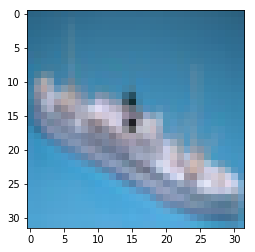

In [11]:
image = load_image("/data/cifar/test/ship/1223_ship.png")
plt.imshow(image)
image = image.reshape((1,)+image.shape)

In [12]:
guess = (model.predict(image))
guess

array([[  7.34863058e-02,   2.59063585e-04,   4.61118948e-03,
          3.62003542e-04,   2.37434520e-03,   1.90411825e-04,
          2.01751431e-03,   1.90411825e-04,   9.16225433e-01,
          2.83296424e-04]], dtype=float32)

In [13]:
cifar_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cifar_labels[np.argmax(guess)]

'ship'